In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data_set = pd.read_csv("../../datasets/Iris/iris.data")
data_set

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
columns = ["sepal length", "sepal width", "petal length", "petal width", "class"]
data_set.columns = columns
data_set

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### I am gonna pop the class because I want to use unsupervised learning

In [56]:
# data_set.drop("class", axis=1)

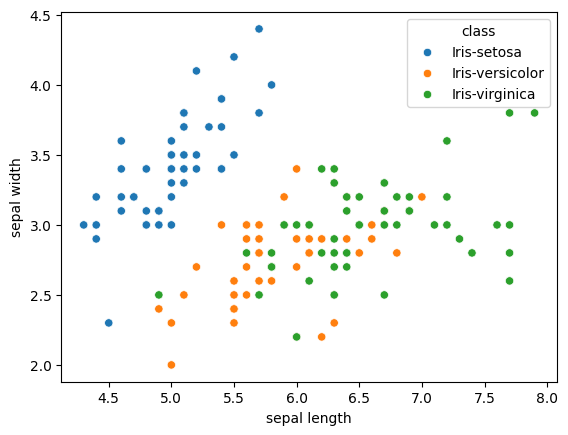

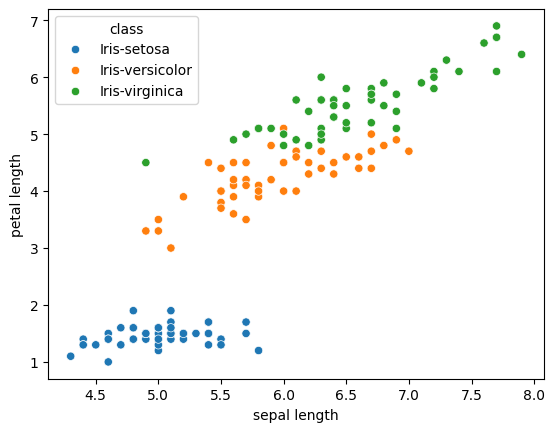

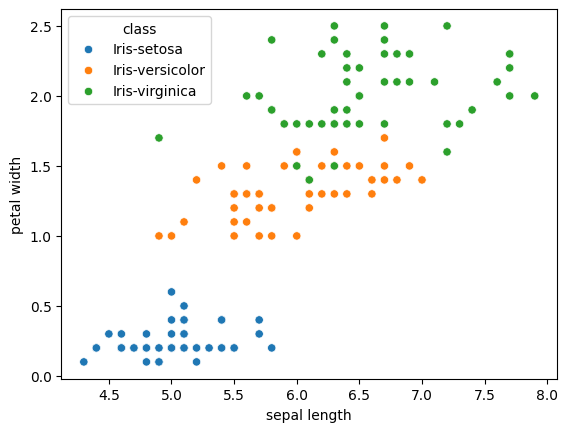

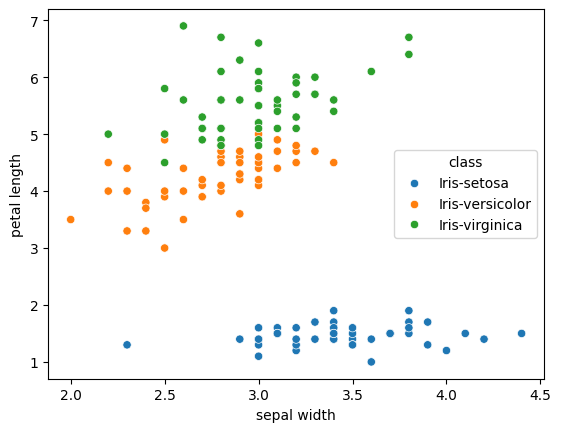

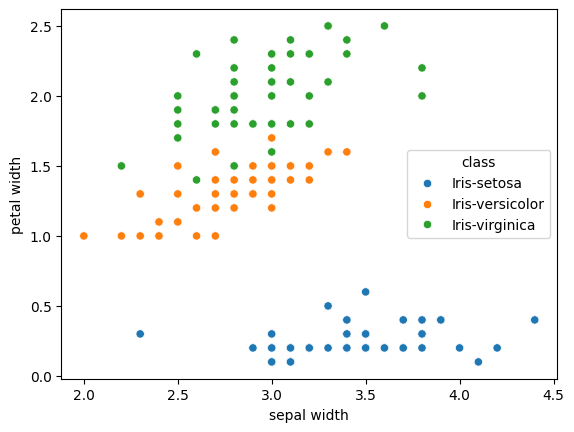

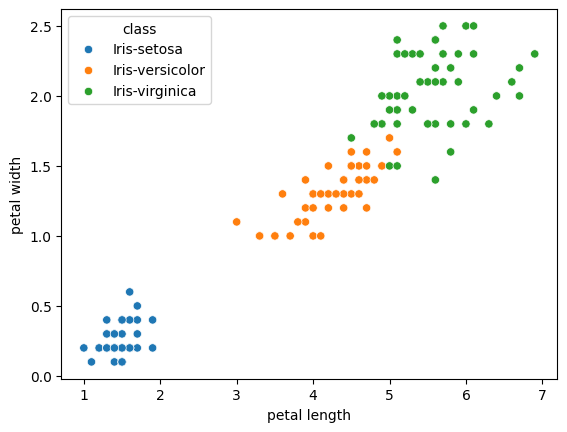

In [57]:
for i in range(len(columns)-1):
    for j in range(i+1, len(columns)-1):
        x_label = data_set[columns[i]]
        y_label = data_set[columns[j]]
        sns.scatterplot(x=x_label, y=y_label, data=data_set, hue="class")
        # plt.scatter(data_set[columns[i]], data_set[columns[j]])
        # plt.xlabel(columns[i])
        # plt.ylabel(columns[j])
        plt.show()

# Clustering

In [58]:
from sklearn.cluster import KMeans

In [64]:
x = "sepal width"
y = "petal width"
X = data_set[[x, y]].values

In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [61]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
cluster_data = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])
cluster_data

,sepal width,petal width,class
0,3.0,0.2,1.0
1,3.2,0.2,1.0
2,3.1,0.2,1.0
3,3.6,0.2,1.0
4,3.9,0.4,1.0
...,...,...,...
144,3.0,2.3,0.0
145,2.5,1.9,0.0
146,3.0,2.0,0.0
147,3.4,2.3,0.0


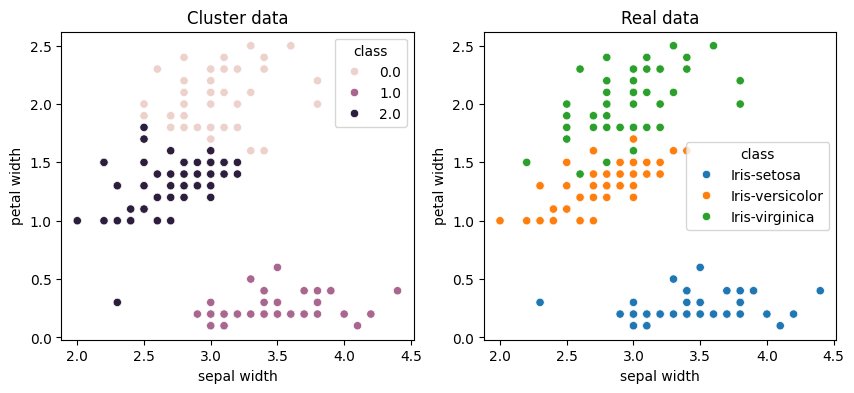

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x=x, y=y, hue="class", data=cluster_data, ax=axes[0])
axes[0].set_title("Cluster data")
sns.scatterplot(x=data_set["sepal width"], y=data_set["petal width"], hue="class", data=data_set, ax=axes[1])
axes[1].set_title("Real data")

plt.show()

In [76]:
x = "sepal length"
y = "sepal width"
X = data_set[[x, y]]

In [77]:
kmeans.fit(X)

c:\Users\migue\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [79]:
cluster_data = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "class"])
cluster_data

,sepal length,sepal width,class
0,4.9,3.0,1.0
1,4.7,3.2,1.0
2,4.6,3.1,1.0
3,5.0,3.6,1.0
4,5.4,3.9,1.0
...,...,...,...
144,6.7,3.0,0.0
145,6.3,2.5,0.0
146,6.5,3.0,0.0
147,6.2,3.4,0.0


Text(0.5, 1.0, 'Real data')

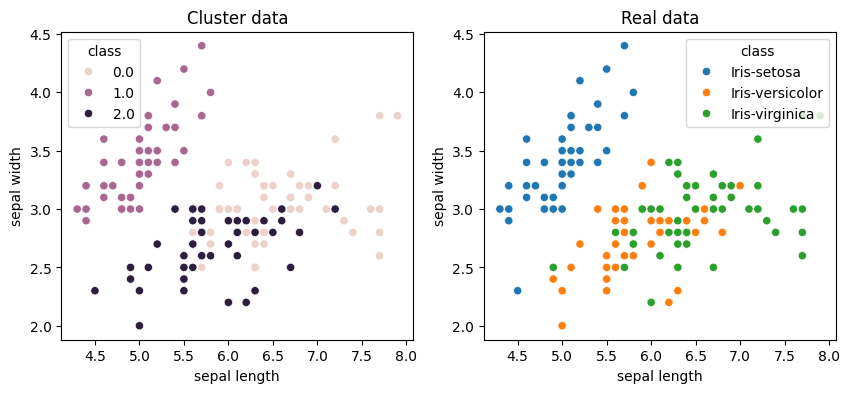

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.scatterplot(x=x, y=y, hue="class", data=cluster_data, ax=axes[0])
axes[0].set_title("Cluster data")
sns.scatterplot(x=data_set["sepal length"], y=data_set["sepal width"], hue="class", data=data_set, ax=axes[1])
axes[1].set_title("Real data")

# PCA

In [83]:
from sklearn.decomposition import PCA

In [87]:
X = data_set[columns[:-1]].values

In [101]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)
transformed_x

array([[-2.73363445, -0.16331092],
       [-2.90803676, -0.13076902],
       [-2.76491784, -0.30475856],
       [-2.7461081 ,  0.34027983],
       [-2.29679724,  0.75348469],
       [-2.83904793, -0.0755604 ],
       [-2.64423265,  0.17657389],
       [-2.90682876, -0.56422248],
       [-2.69199575, -0.10050325],
       [-2.52354747,  0.65790634],
       [-2.63112977,  0.02770681],
       [-2.80576609, -0.2213837 ],
       [-3.24397251, -0.4961847 ],
       [-2.65975154,  1.19234788],
       [-2.39988069,  1.3506441 ],
       [-2.63931625,  0.82429682],
       [-2.66585361,  0.32535115],
       [-2.21575231,  0.88473854],
       [-2.6045924 ,  0.52665249],
       [-2.32791942,  0.4034959 ],
       [-2.56060135,  0.44614179],
       [-3.23368084,  0.14876388],
       [-2.32098224,  0.11122065],
       [-2.37424051, -0.02540228],
       [-2.52611151, -0.13313497],
       [-2.48686648,  0.14385237],
       [-2.57982864,  0.38073938],
       [-2.65733554,  0.32544096],
       [-2.6511475 ,

In [94]:
print(X.shape)
print(transformed_x.shape)

(149, 4)
(149, 2)


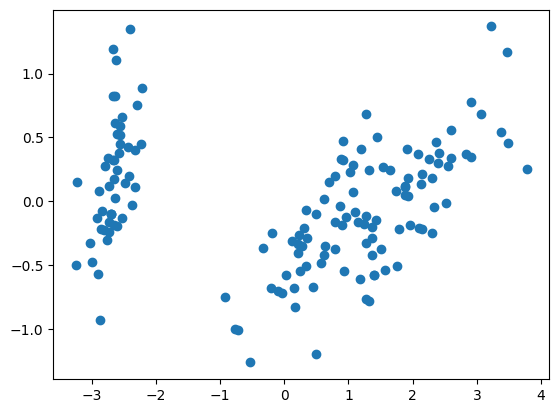

In [97]:
plt.scatter(transformed_x[:, 0], transformed_x[:, 1])

In [102]:
kmeans_pca_data = pd.DataFrame(np.hstack((transformed_x, clusters.reshape(-1, 1))), columns=["pc1", "pc2", "class"])
kmeans_pca_data

,pc1,pc2,class
0,-2.733634,-0.163311,1.0
1,-2.908037,-0.130769,1.0
2,-2.764918,-0.304759,1.0
3,-2.746108,0.340280,1.0
4,-2.296797,0.753485,1.0
...,...,...,...
144,1.926270,0.186756,0.0
145,1.507098,-0.375136,0.0
146,1.746139,0.078120,0.0
147,1.883721,0.115446,0.0


In [104]:
real_pca_data = pd.DataFrame(np.hstack((transformed_x, data_set["class"].values.reshape(-1, 1))), columns=["pc1", "pc2", "class"])
real_pca_data

,pc1,pc2,class
0,-2.733634,-0.163311,Iris-setosa
1,-2.908037,-0.130769,Iris-setosa
2,-2.764918,-0.304759,Iris-setosa
3,-2.746108,0.34028,Iris-setosa
4,-2.296797,0.753485,Iris-setosa
...,...,...,...
144,1.92627,0.186756,Iris-virginica
145,1.507098,-0.375136,Iris-virginica
146,1.746139,0.07812,Iris-virginica
147,1.883721,0.115446,Iris-virginica


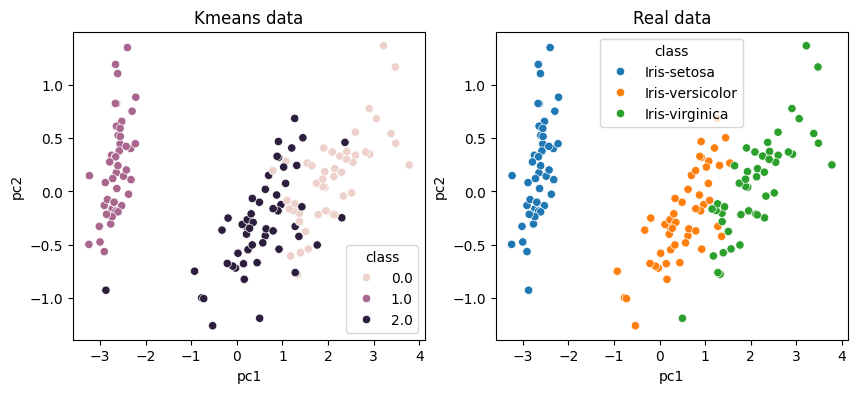

In [106]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 

sns.scatterplot(x=kmeans_pca_data["pc1"], y=kmeans_pca_data["pc2"], hue="class", data=kmeans_pca_data, ax=axes[0])
axes[0].set_title("Kmeans data")
sns.scatterplot(x=real_pca_data["pc1"], y=real_pca_data["pc2"], hue="class", data=real_pca_data, ax=axes[1])
axes[1].set_title("Real data")

plt.show()